In [1]:
import pandas as pd
import numpy as np
import os
os.chdir("C://Users\Manish sharma\Downloads")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import json
import csv
with open('customersdata.json','r') as f:     
    input = json.loads("[" + f.read().replace("}\n{", "},\n{") + "]")
   

In [3]:
# Converting json file to csv 


df = pd.DataFrame( columns = ['customerDevice','customerEmail','customerIPAddress','customerPhone','customerBillingAddress',
                              'fraudulent','orderAmount','orderId','orderShippingAddress','orderState']) 
a=0
for i in input:
    for j in (i['orders']):
        df.loc[a]= (i["customer"]["customerDevice"],i["customer"]["customerEmail"],i["customer"]["customerIPAddress"],i["customer"]["customerPhone"],i["customer"]["customerBillingAddress"],
                    i["fraudulent"],j["orderAmount"],j["orderId"],j["orderShippingAddress"],j["orderState"])
        a=a+1

a=0
df_1= pd.DataFrame( columns = ['orderId','paymentMethodId','transactionAmount','transactionFailed','transactionId'])

for i in input: 
      for j in (i["transactions"]):
            df_1.loc[a]=(j["orderId"],j["paymentMethodId"],j["transactionAmount"],j["transactionFailed"],j["transactionId"])
            a=a+1
        
a=0
df_2 = pd.DataFrame( columns = ['paymentMethodId','paymentMethodIssuer','paymentMethodProvider','paymentMethodRegistrationFailure','paymentMethodType'])

for i in input: 
    for j in (i["paymentMethods"]):
        df_2.loc[a]=(j["paymentMethodId"],j["paymentMethodIssuer"],j["paymentMethodProvider"],j["paymentMethodRegistrationFailure"],j["paymentMethodType"])
        a=a+1
        
df_transaction = df.merge(df_1, how='left')
df_final = df_transaction.merge(df_2, how='left')

In [4]:
df_final.to_csv('Cust_fraud.csv')

In [5]:
cust=pd.read_csv("Cust_fraud.csv")

In [6]:
cust.info()
cust.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 19 columns):
Unnamed: 0                          623 non-null int64
customerDevice                      623 non-null object
customerEmail                       623 non-null object
customerIPAddress                   623 non-null object
customerPhone                       623 non-null object
customerBillingAddress              623 non-null object
fraudulent                          623 non-null bool
orderAmount                         623 non-null int64
orderId                             623 non-null object
orderShippingAddress                623 non-null object
orderState                          623 non-null object
paymentMethodId                     623 non-null object
transactionAmount                   623 non-null int64
transactionFailed                   623 non-null bool
transactionId                       623 non-null object
paymentMethodIssuer                 623 non-null object
paymen

(623, 19)

In [7]:
cust.head()
cust=cust.drop(["Unnamed: 0"],axis=1)

In [8]:
cust.head()

,customerDevice,customerEmail,customerIPAddress,customerPhone,customerBillingAddress,fraudulent,orderAmount,orderId,orderShippingAddress,orderState,paymentMethodId,transactionAmount,transactionFailed,transactionId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,"5493 Jones Islands\nBrownside, CA 51896",False,18,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending,wt07xm68b,18,False,a9lcj51r,Citizens First Banks,JCB 16 digit,True,card
1,yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,"5493 Jones Islands\nBrownside, CA 51896",False,26,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled,wt07xm68b,26,False,y4wcv03i,Citizens First Banks,JCB 16 digit,True,card
2,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,45,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled,41ug157xz,45,False,5mi94sfw,Bastion Banks,American Express,False,bitcoin
3,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,23,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled,41ug157xz,23,False,br8ba1nu,Bastion Banks,American Express,False,bitcoin
4,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,True,43,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled,y3xp697jx,43,True,a33145ss,Solace Banks,VISA 16 digit,True,bitcoin


In [9]:
#As customer details won't be relevant for classifying a transaction as fraudulent and neither billing/shipping address so removing this columns is beneficial
cols=['customerDevice','customerDevice','customerBillingAddress','customerEmail','customerIPAddress','customerPhone','customerBillingAddress','orderId','orderShippingAddress','paymentMethodId','transactionId']
cust.drop(cols,axis=1,inplace=True)

In [10]:
print(cust.shape)
cust.isnull().sum()

(623, 9)


fraudulent                          0
orderAmount                         0
orderState                          0
transactionAmount                   0
transactionFailed                   0
paymentMethodIssuer                 0
paymentMethodProvider               0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
dtype: int64

In [11]:
#our target variable
np.unique(cust.fraudulent,return_counts=True)

(array([False,  True]), array([366, 257], dtype=int64))

In [12]:
#Converting columns into numeric(binary) format 
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
cust.fraudulent=LB.fit_transform(cust.fraudulent)
cust.orderState=LB.fit_transform(cust.orderState)
cust.transactionFailed=LB.fit_transform(cust.transactionFailed)
cust.paymentMethodRegistrationFailure=LB.fit_transform(cust.paymentMethodRegistrationFailure)
cust.paymentMethodType=LB.fit_transform(cust.paymentMethodType)
cust.paymentMethodIssuer=LB.fit_transform(cust.paymentMethodIssuer)
cust.paymentMethodProvider=LB.fit_transform(cust.paymentMethodProvider)


In [13]:
np.unique(cust.fraudulent,return_counts=True)

(array([0, 1], dtype=int64), array([366, 257], dtype=int64))

In [14]:
cust.head()

,fraudulent,orderAmount,orderState,transactionAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,0,18,2,18,0,3,4,1,2
1,0,26,1,26,0,3,4,1,2
2,1,45,1,45,0,1,0,0,1
3,1,23,1,23,0,1,0,0,1
4,1,43,1,43,1,9,8,1,1


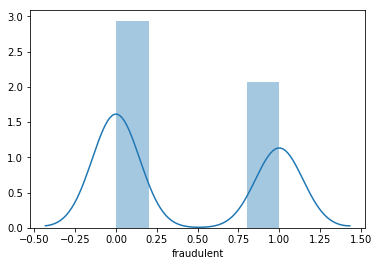

In [15]:
sns.distplot(cust.fraudulent)

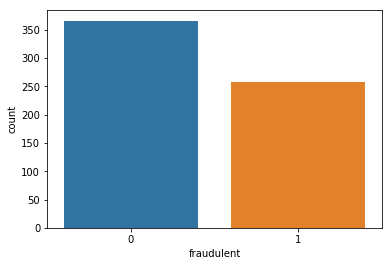

In [16]:
sns.countplot(cust.fraudulent)

In [17]:
cust.describe()

,fraudulent,orderAmount,orderState,transactionAmount,transactionFailed,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
count,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.412520,34.598716,0.969502,34.598716,0.269663,5.828250,4.826645,0.131621,1.844302
std,0.492683,20.360247,0.413635,20.360247,0.444141,3.478603,2.779483,0.338350,0.666007
min,0.000000,10.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,1.000000,21.000000,0.000000,3.000000,3.000000,0.000000,2.000000
50%,0.000000,34.000000,1.000000,34.000000,0.000000,6.000000,5.000000,0.000000,2.000000
75%,1.000000,45.000000,1.000000,45.000000,1.000000,8.000000,8.000000,0.000000,2.000000
max,1.000000,353.000000,2.000000,353.000000,1.000000,18.000000,9.000000,1.000000,3.000000


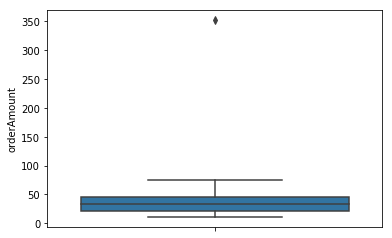

In [18]:
sns.boxplot(x=cust.orderAmount,orient='v')

In [19]:
#describing outliers present in our dataset
def outliers(x):
    q1=np.percentile(x,25)
    q3=np.percentile(x,75)
    iqr=q3-q1
    lower=q1-(1.5*iqr)
    upper=q3+(1.5*iqr)
    outlier_indics=list(x.index[(x<lower)|(x>upper)])
    outlier_value=list(x[outlier_indics])
    
    return outlier_indics,outlier_value
indics,value=outliers(cust.orderAmount)
print(indics)
print(value)

[189]
[353]


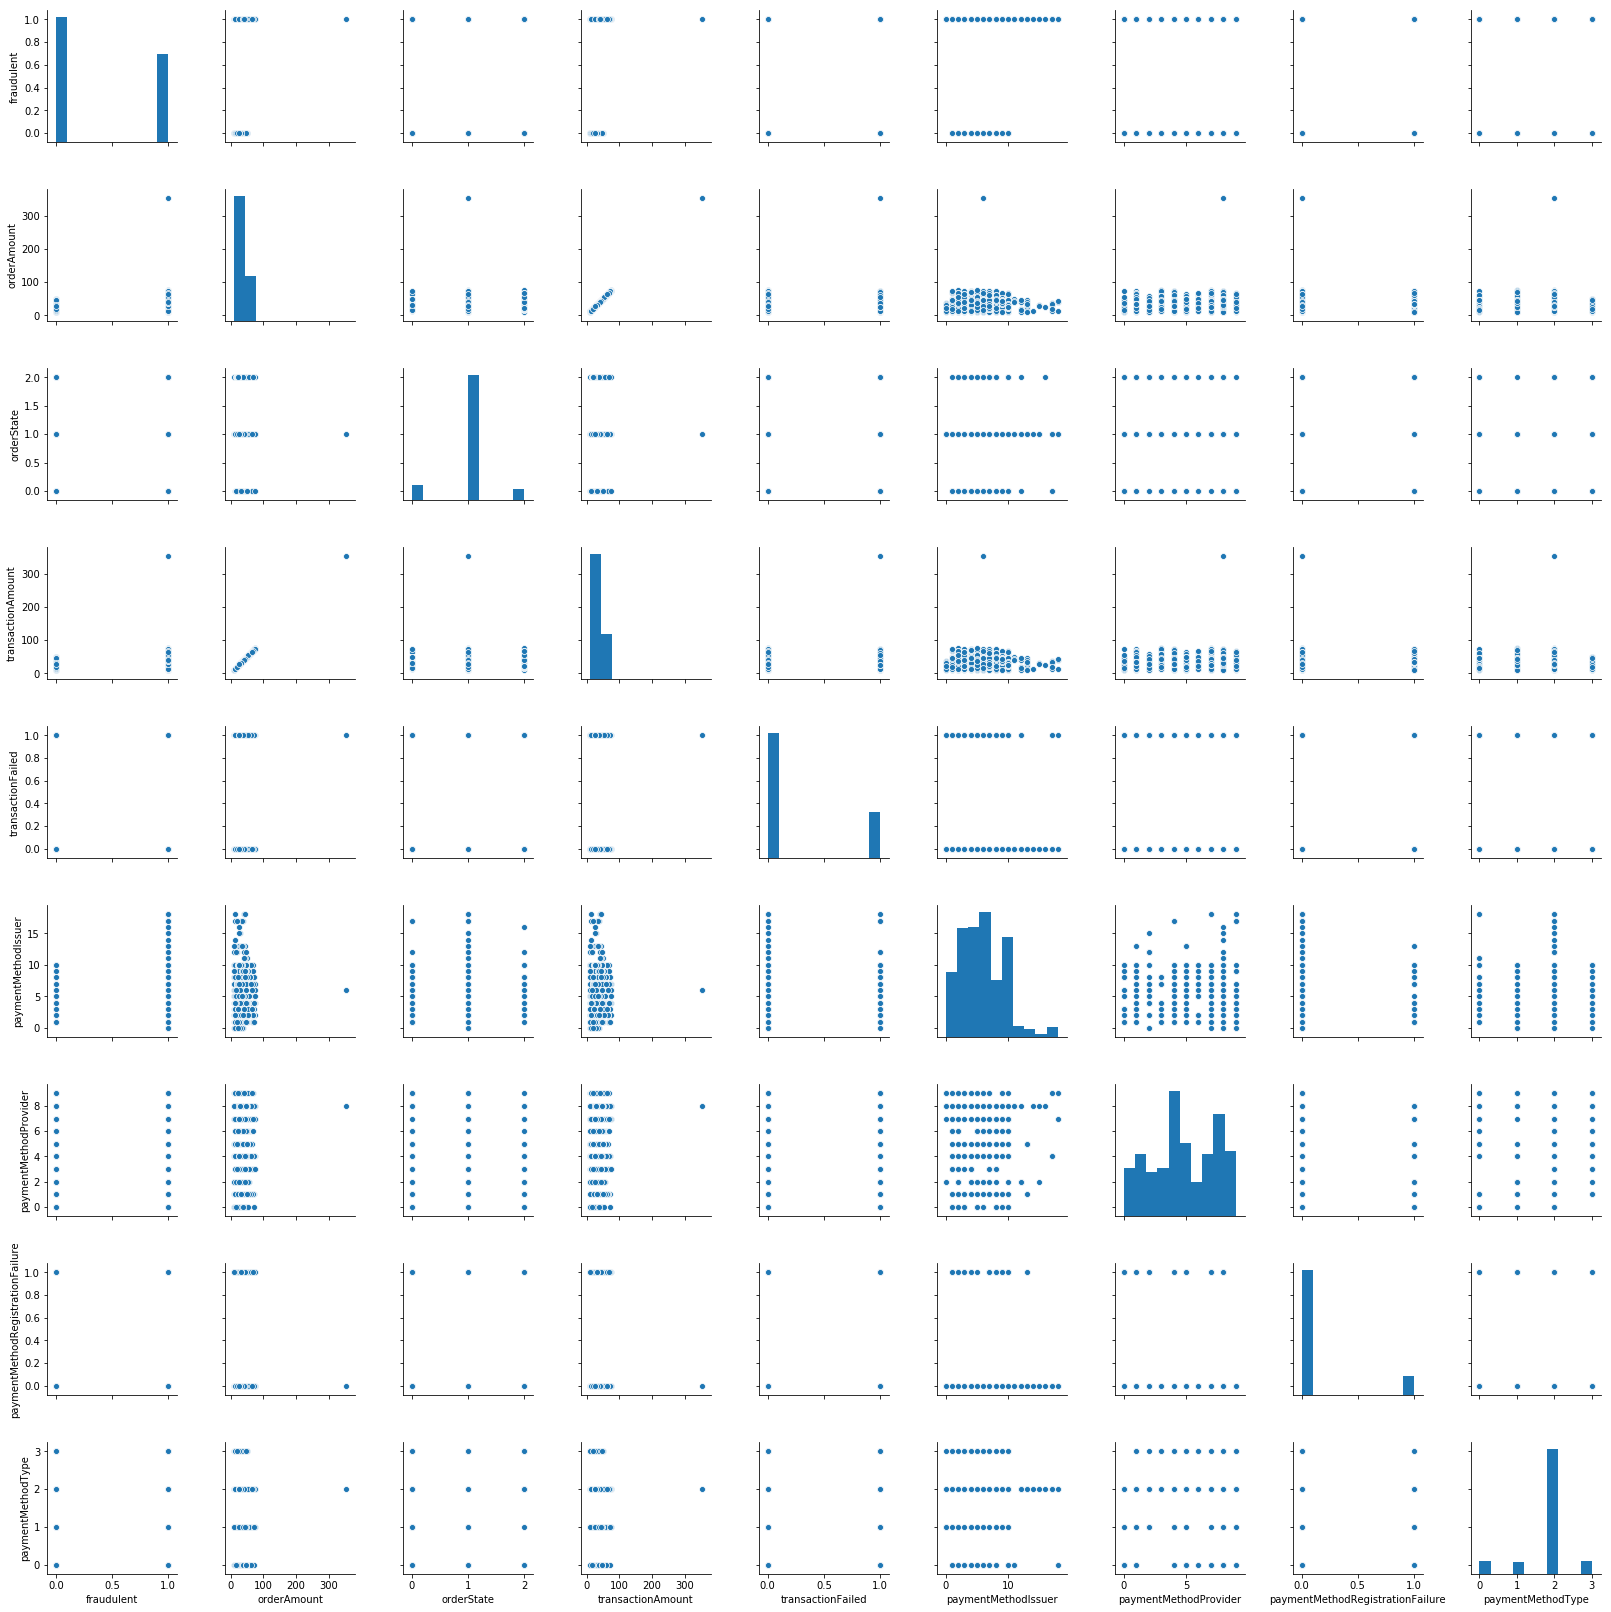

In [20]:
sns.pairplot(cust)

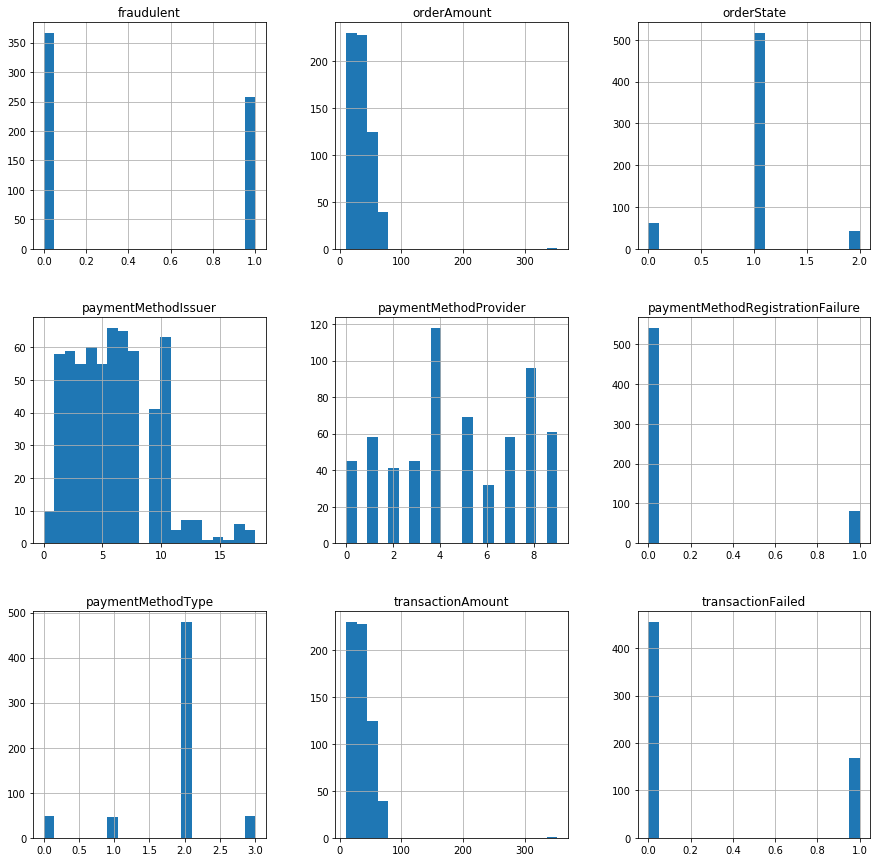

In [21]:
#distribution of individual variable in our dataset
hist=cust.hist(bins=20,figsize=(15,15))

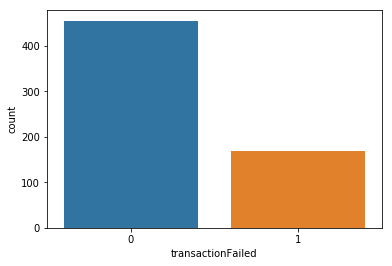

In [22]:
sns.countplot(cust.transactionFailed)

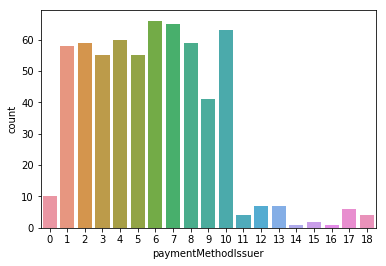

In [23]:
sns.countplot(cust.paymentMethodIssuer)

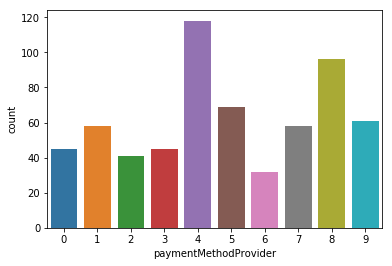

In [24]:
sns.countplot(cust.paymentMethodProvider)

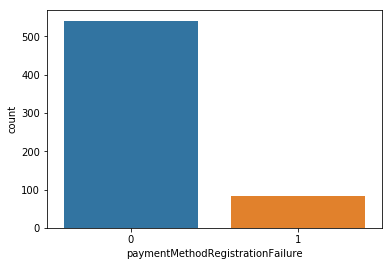

In [25]:
sns.countplot(cust.paymentMethodRegistrationFailure)

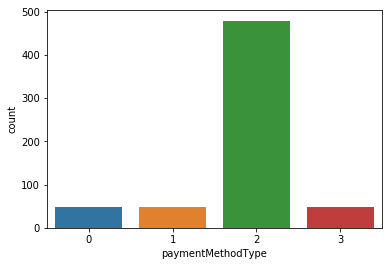

In [26]:
sns.countplot(cust.paymentMethodType)

C:\Users\Manish sharma\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


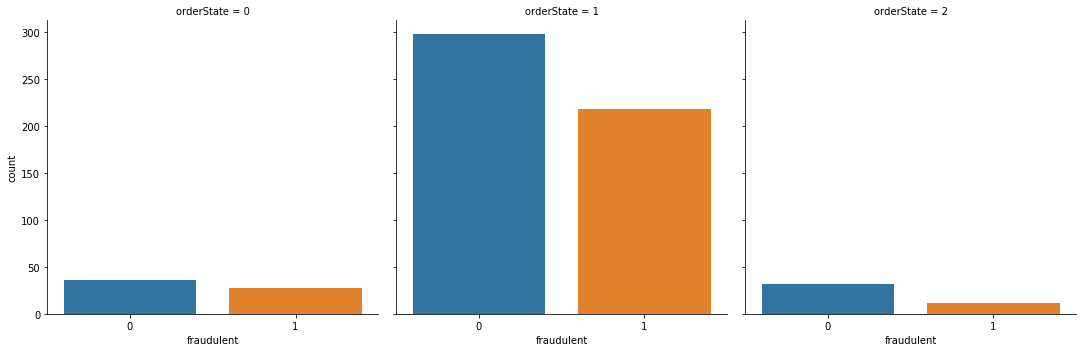

In [27]:
sns.factorplot(x='fraudulent',col='orderState',kind='count',data=cust)

C:\Users\Manish sharma\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


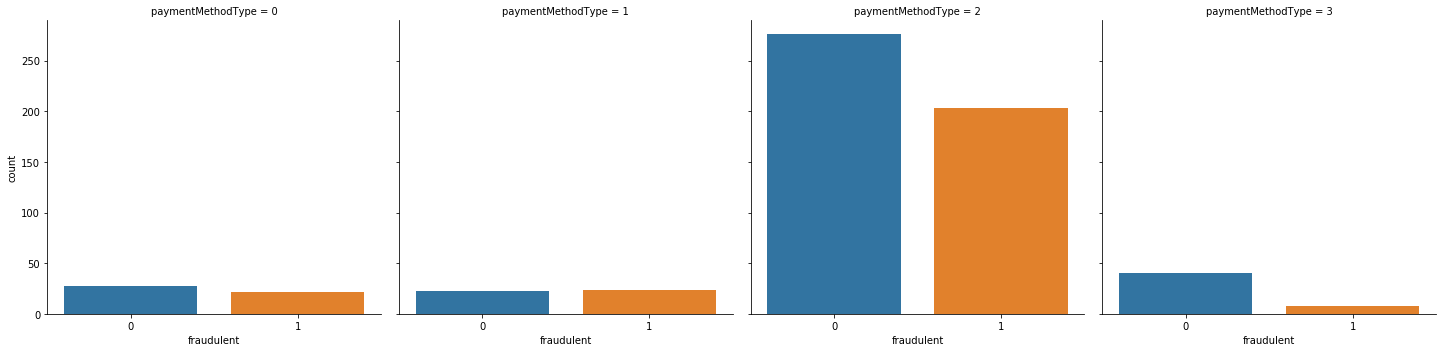

In [28]:
sns.factorplot(x='fraudulent' ,col='paymentMethodType' ,kind='count', data=cust)

In [29]:
x=cust.drop('fraudulent',axis=1)
y=cust.fraudulent

In [30]:
# splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y,
                                                    test_size = 0.25,
                                                    random_state = 0 )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(467, 8)
(467,)
(156, 8)
(156,)


In [31]:
# boosting
# build decision tree
from sklearn.tree import DecisionTreeClassifier
CART = DecisionTreeClassifier(class_weight='balanced',min_samples_split=10,
                              min_samples_leaf=2,min_impurity_decrease=0.005)
# build the adaboost object
from sklearn.ensemble import AdaBoostClassifier
ADB = AdaBoostClassifier(base_estimator=CART)

# build grid search parameters
parms = {'n_estimators': [50,100], 
         'learning_rate': [0.1,0.3,0.5,0.8,1]} 

from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(estimator = ADB,param_grid = parms, scoring = 'roc_auc',cv=3,refit=True,
                           return_train_score = True,verbose=10,n_jobs=1)
CV.fit(X_train,Y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV]  learning_rate=0.1, n_estimators=50, score=(train=1.000, test=0.902), total=   0.1s
[CV] learning_rate=0.1, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.1, n_estimators=50, score=(train=1.000, test=0.814), total=   0.1s
[CV] learning_rate=0.1, n_estimators=50 ..............................
[CV]  learning_rate=0.1, n_estimators=50, score=(train=1.000, test=0.807), total=   0.1s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV]  learning_rate=0.1, n_estimators=100, score=(train=1.000, test=0.885), total=   0.2s
[CV] learning_rate=0.1, n_estimators=100 .............................
[CV]  learning_rate=0.1, n_estimators=100, score=(train=1.000, test=0.819), total=   0.2s
[CV] learning_rate=0.1, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s remaining:    0.0s


[CV]  learning_rate=0.1, n_estimators=100, score=(train=1.000, test=0.810), total=   0.2s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV]  learning_rate=0.3, n_estimators=50, score=(train=1.000, test=0.841), total=   0.1s
[CV] learning_rate=0.3, n_estimators=50 ..............................
[CV]  learning_rate=0.3, n_estimators=50, score=(train=1.000, test=0.805), total=   0.1s
[CV] learning_rate=0.3, n_estimators=50 ..............................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=0.3, n_estimators=50, score=(train=1.000, test=0.816), total=   0.1s
[CV] learning_rate=0.3, n_estimators=100 .............................
[CV]  learning_rate=0.3, n_estimators=100, score=(train=1.000, test=0.852), total=   0.1s
[CV] learning_rate=0.3, n_estimators=100 .............................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    1.0s remaining:    0.0s


[CV]  learning_rate=0.3, n_estimators=100, score=(train=1.000, test=0.828), total=   0.2s
[CV] learning_rate=0.3, n_estimators=100 .............................
[CV]  learning_rate=0.3, n_estimators=100, score=(train=1.000, test=0.822), total=   0.1s
[CV] learning_rate=0.5, n_estimators=50 ..............................
[CV]  learning_rate=0.5, n_estimators=50, score=(train=1.000, test=0.833), total=   0.1s
[CV] learning_rate=0.5, n_estimators=50 ..............................
[CV]  learning_rate=0.5, n_estimators=50, score=(train=1.000, test=0.824), total=   0.1s
[CV] learning_rate=0.5, n_estimators=50 ..............................
[CV]  learning_rate=0.5, n_estimators=50, score=(train=1.000, test=0.820), total=   0.1s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV]  learning_rate=0.5, n_estimators=100, score=(train=1.000, test=0.866), total=   0.2s
[CV] learning_rate=0.5, n_estimators=100 .............................
[CV]  learning_rate=0.5, n_estimators

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.2s finished
C:\Users\Manish sharma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.005,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=2,
                                                                        

In [32]:
CVResults = pd.DataFrame(CV.cv_results_)
print(CVResults)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.093335      0.025597         0.004030        0.003283   
1       0.146661      0.007886         0.016674        0.001256   
2       0.075138      0.005343         0.006063        0.002760   
3       0.136624      0.005092         0.011536        0.000858   
4       0.070571      0.001245         0.006810        0.006536   
5       0.141276      0.005435         0.009539        0.001135   
6       0.073052      0.000805         0.008203        0.000100   
7       0.136393      0.003390         0.013002        0.003768   
8       0.067182      0.003913         0.007636        0.003850   
9       0.252856      0.075362         0.026345        0.002259   

  param_learning_rate param_n_estimators  \
0                 0.1                 50   
1                 0.1                100   
2                 0.3                 50   
3                 0.3                100   
4                 0.5                 50  

In [33]:
print(CV.best_score_)
print(CV.best_params_)

0.8506962226448308
{'learning_rate': 0.8, 'n_estimators': 100}


In [34]:
# Preidct on Test data and check the confusion matrix
predictTest = CV.predict(X_test)
# generate confusion matrix
# import confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print (confusion_matrix(Y_test,predictTest))
print (classification_report(Y_test,predictTest))

[[87  8]
 [16 45]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        95
           1       0.85      0.74      0.79        61

    accuracy                           0.85       156
   macro avg       0.85      0.83      0.83       156
weighted avg       0.85      0.85      0.84       156



In [35]:
# predict probabilities
predictProb = CV.predict_proba(X_test)
print(predictProb[0:10])
PProb = pd.DataFrame(predictProb)

[[0.06768995 0.93231005]
 [0.01433833 0.98566167]
 [0.65468381 0.34531619]
 [0.87361483 0.12638517]
 [0.90663313 0.09336687]
 [0.96877009 0.03122991]
 [0.50482604 0.49517396]
 [0.02109953 0.97890047]
 [0.05385976 0.94614024]
 [0.99214063 0.00785937]]


In [36]:
from sklearn.metrics import roc_auc_score, roc_curve
AUC = roc_auc_score(Y_test, PProb[1])
print(AUC)
# define variables for True Positive Rate and Falst Positive Rate & threshold value
TPR = dict()
FPR = dict()
THR = dict()
FPR, TPR, THR = roc_curve(Y_test, PProb[1])

0.9199309749784297


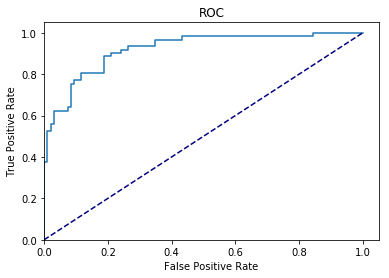

In [37]:
plt.figure()
# plot the FPR as X-axis and TPR as Y-axis
plt.plot(FPR, TPR)
# plot the minimum line 
plt.plot([0,1], [0,1], color='navy', linestyle = '--')
# set X and Y limits
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
# mention lables for X and Y
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

Accuracy: 85%
Area Under Curve : 91%

